
Decision Tree Classifier - Performance:
Train Accuracy: 1.0000
Test Accuracy: 1.0000


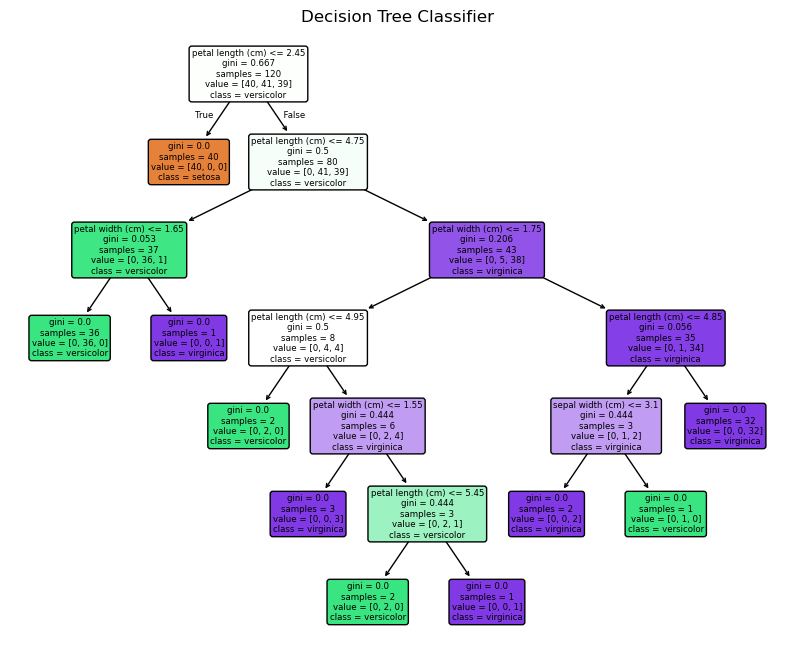


Decision Tree Regressor - Performance:
Train MSE: 0.0000
Test MSE: 1509.5751
Train R²: 1.0000
Test R²: 0.8275


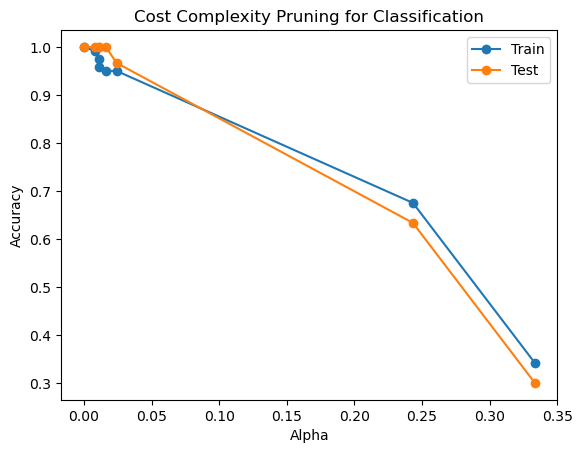


Random Forest Classifier - Performance:
Test Accuracy: 1.0000

AdaBoost Classifier - Performance:
Test Accuracy: 0.9333

Random Forest Regressor - Performance:
Test MSE: 867.2617
Test R²: 0.9009

AdaBoost Regressor - Performance:
Test MSE: 3629.2219
Test R²: 0.5853


In [4]:

# 5. Learn Decision trees for regression and classification problem
# a. Split the data set into training and test sets.
# b. Build the decision tree
# c. Check model performances on training and test data sets.
# d. Apply cost complexity pruning to overcome overfitting problem
# e. Apply Random Forest algorithm to overcome overfitting problem.
# f. Apply Ada-boost ensemble method on Decision stumps.

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, AdaBoostRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 1. Load datasets
# For classification, we will use the Iris dataset
iris = load_iris()
X_class, y_class = iris.data, iris.target

# For regression, we will use a synthetic regression dataset
X_reg, y_reg = make_regression(n_samples=200, n_features=5, noise=0.1, random_state=42)

# 2. Split datasets into training and test sets (80-20 split)
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# 3. Build the Decision Tree for Classification
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_class_train, y_class_train)

# 4. Evaluate performance on training and test data for classification
y_class_train_pred = dt_classifier.predict(X_class_train)
y_class_test_pred = dt_classifier.predict(X_class_test)

print("\nDecision Tree Classifier - Performance:")
print(f"Train Accuracy: {accuracy_score(y_class_train, y_class_train_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_class_test, y_class_test_pred):.4f}")

# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(dt_classifier, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.title("Decision Tree Classifier")
plt.show()

# 5. Build the Decision Tree for Regression
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_reg_train, y_reg_train)

# 6. Evaluate performance on training and test data for regression
y_reg_train_pred = dt_regressor.predict(X_reg_train)
y_reg_test_pred = dt_regressor.predict(X_reg_test)

print("\nDecision Tree Regressor - Performance:")
print(f"Train MSE: {mean_squared_error(y_reg_train, y_reg_train_pred):.4f}")
print(f"Test MSE: {mean_squared_error(y_reg_test, y_reg_test_pred):.4f}")
print(f"Train R²: {r2_score(y_reg_train, y_reg_train_pred):.4f}")
print(f"Test R²: {r2_score(y_reg_test, y_reg_test_pred):.4f}")

# 7. Apply Cost Complexity Pruning to avoid overfitting for Classification
path_classifier = dt_classifier.cost_complexity_pruning_path(X_class_train, y_class_train)
ccp_alphas_classifier, impurities_classifier = path_classifier.ccp_alphas, path_classifier.impurities

# Train decision trees with different alpha values and evaluate
clfs = []
for ccp_alpha in ccp_alphas_classifier:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_class_train, y_class_train)
    clfs.append(clf)

# Plot the decision tree's performance on the training set for different alpha values
train_accuracies = [accuracy_score(y_class_train, clf.predict(X_class_train)) for clf in clfs]
test_accuracies = [accuracy_score(y_class_test, clf.predict(X_class_test)) for clf in clfs]

plt.plot(ccp_alphas_classifier, train_accuracies, label="Train", marker="o")
plt.plot(ccp_alphas_classifier, test_accuracies, label="Test", marker="o")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Cost Complexity Pruning for Classification")
plt.show()

# 8. Apply Random Forest for Classification
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_class_train, y_class_train)

# Evaluate performance
y_rf_class_pred = rf_classifier.predict(X_class_test)
print("\nRandom Forest Classifier - Performance:")
print(f"Test Accuracy: {accuracy_score(y_class_test, y_rf_class_pred):.4f}")

# 9. Apply AdaBoost for Classification using Decision Stumps (shallow trees)
ada_classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
ada_classifier.fit(X_class_train, y_class_train)

# Evaluate performance
y_ada_class_pred = ada_classifier.predict(X_class_test)
print("\nAdaBoost Classifier - Performance:")
print(f"Test Accuracy: {accuracy_score(y_class_test, y_ada_class_pred):.4f}")

# 10. Apply Random Forest for Regression
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_reg_train, y_reg_train)

# Evaluate performance
y_rf_reg_pred = rf_regressor.predict(X_reg_test)
print("\nRandom Forest Regressor - Performance:")
print(f"Test MSE: {mean_squared_error(y_reg_test, y_rf_reg_pred):.4f}")
print(f"Test R²: {r2_score(y_reg_test, y_rf_reg_pred):.4f}")

# 11. Apply AdaBoost for Regression using Decision Stumps
ada_regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=1), n_estimators=50, random_state=42)
ada_regressor.fit(X_reg_train, y_reg_train)

# Evaluate performance
y_ada_reg_pred = ada_regressor.predict(X_reg_test)
print("\nAdaBoost Regressor - Performance:")
print(f"Test MSE: {mean_squared_error(y_reg_test, y_ada_reg_pred):.4f}")
print(f"Test R²: {r2_score(y_reg_test, y_ada_reg_pred):.4f}")



Decision Tree Classifier - Performance:
Train Accuracy: 1.0000
Test Accuracy: 1.0000


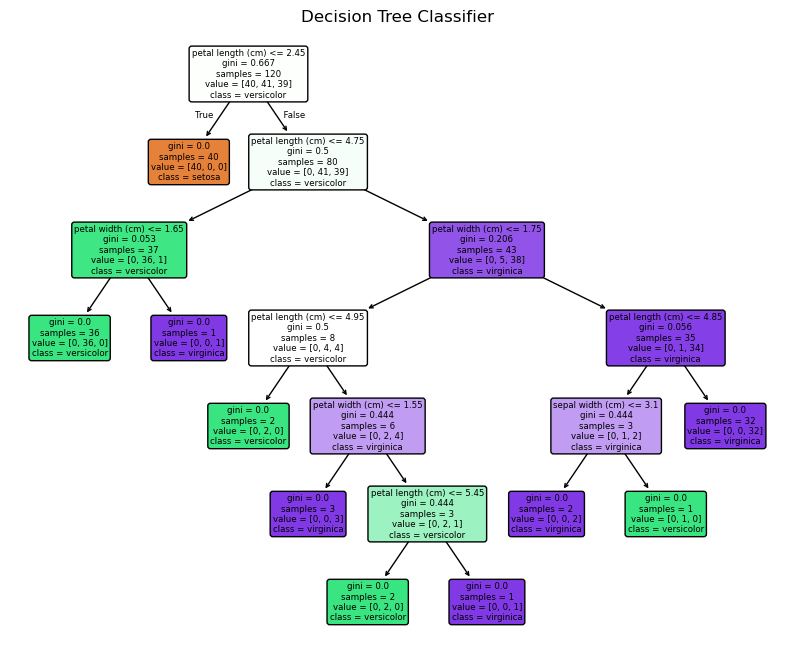


Decision Tree Regressor - Performance:
Train MSE: 0.0000
Test MSE: 1509.5751
Train R²: 1.0000
Test R²: 0.8275


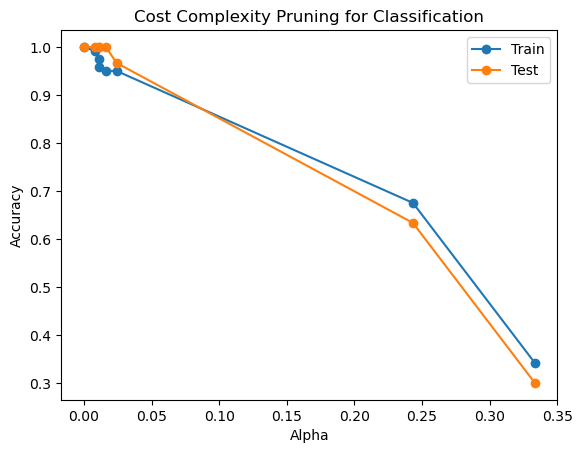


Random Forest Classifier - Performance:
Test Accuracy: 1.0000

AdaBoost Classifier - Performance:
Test Accuracy: 0.9333

Random Forest Regressor - Performance:
Test MSE: 867.2617
Test R²: 0.9009

AdaBoost Regressor - Performance:
Test MSE: 3629.2219
Test R²: 0.5853


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, AdaBoostRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier

# 1. Load datasets
# For classification, we will use the Iris dataset
iris = load_iris()
X_class, y_class = iris.data, iris.target

# For regression, we will use a synthetic regression dataset
X_reg, y_reg = make_regression(n_samples=200, n_features=5, noise=0.1, random_state=42)

# 2. Split datasets into training and test sets (80-20 split)
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# 3. Build the Decision Tree for Classification
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_class_train, y_class_train)

# 4. Evaluate performance on training and test data for classification
y_class_train_pred = dt_classifier.predict(X_class_train)
y_class_test_pred = dt_classifier.predict(X_class_test)

print("\nDecision Tree Classifier - Performance:")
print(f"Train Accuracy: {accuracy_score(y_class_train, y_class_train_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_class_test, y_class_test_pred):.4f}")

# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(dt_classifier, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.title("Decision Tree Classifier")
plt.show()

# 5. Build the Decision Tree for Regression
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_reg_train, y_reg_train)

# 6. Evaluate performance on training and test data for regression
y_reg_train_pred = dt_regressor.predict(X_reg_train)
y_reg_test_pred = dt_regressor.predict(X_reg_test)

print("\nDecision Tree Regressor - Performance:")
print(f"Train MSE: {mean_squared_error(y_reg_train, y_reg_train_pred):.4f}")
print(f"Test MSE: {mean_squared_error(y_reg_test, y_reg_test_pred):.4f}")
print(f"Train R²: {r2_score(y_reg_train, y_reg_train_pred):.4f}")
print(f"Test R²: {r2_score(y_reg_test, y_reg_test_pred):.4f}")

# 7. Apply Cost Complexity Pruning to avoid overfitting for Classification
path_classifier = dt_classifier.cost_complexity_pruning_path(X_class_train, y_class_train)
ccp_alphas_classifier, impurities_classifier = path_classifier.ccp_alphas, path_classifier.impurities

# Train decision trees with different alpha values and evaluate
clfs = []
for ccp_alpha in ccp_alphas_classifier:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_class_train, y_class_train)
    clfs.append(clf)

# Plot the decision tree's performance on the training set for different alpha values
train_accuracies = [accuracy_score(y_class_train, clf.predict(X_class_train)) for clf in clfs]
test_accuracies = [accuracy_score(y_class_test, clf.predict(X_class_test)) for clf in clfs]

plt.plot(ccp_alphas_classifier, train_accuracies, label="Train", marker="o")
plt.plot(ccp_alphas_classifier, test_accuracies, label="Test", marker="o")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Cost Complexity Pruning for Classification")
plt.show()

# 8. Apply Random Forest for Classification
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_class_train, y_class_train)

# Evaluate performance
y_rf_class_pred = rf_classifier.predict(X_class_test)
print("\nRandom Forest Classifier - Performance:")
print(f"Test Accuracy: {accuracy_score(y_class_test, y_rf_class_pred):.4f}")

# 9. Apply AdaBoost for Classification using Decision Stumps (shallow trees)
ada_classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
ada_classifier.fit(X_class_train, y_class_train)

# Evaluate performance
y_ada_class_pred = ada_classifier.predict(X_class_test)
print("\nAdaBoost Classifier - Performance:")
print(f"Test Accuracy: {accuracy_score(y_class_test, y_ada_class_pred):.4f}")

# 10. Apply Random Forest for Regression
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_reg_train, y_reg_train)

# Evaluate performance
y_rf_reg_pred = rf_regressor.predict(X_reg_test)
print("\nRandom Forest Regressor - Performance:")
print(f"Test MSE: {mean_squared_error(y_reg_test, y_rf_reg_pred):.4f}")
print(f"Test R²: {r2_score(y_reg_test, y_rf_reg_pred):.4f}")

# 11. Apply AdaBoost for Regression using Decision Stumps
ada_regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=1), n_estimators=50, random_state=42)
ada_regressor.fit(X_reg_train, y_reg_train)

# Evaluate performance
y_ada_reg_pred = ada_regressor.predict(X_reg_test)
print("\nAdaBoost Regressor - Performance:")
print(f"Test MSE: {mean_squared_error(y_reg_test, y_ada_reg_pred):.4f}")
print(f"Test R²: {r2_score(y_reg_test, y_ada_reg_pred):.4f}")


In [15]:
#regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Generate synthetic data for regression
X_reg, y_reg = make_regression(n_samples=200, n_features=5, noise=0.1, random_state=42)

# 2. Split dataset into training and test sets (80-20 split)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# 3. Build the Decision Tree for Regression
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_reg_train, y_reg_train)

# 4. Evaluate performance on training and test data for regression
y_reg_train_pred = dt_regressor.predict(X_reg_train)
y_reg_test_pred = dt_regressor.predict(X_reg_test)

print("\nDecision Tree Regressor - Performance:")
print(f"Train MSE: {mean_squared_error(y_reg_train, y_reg_train_pred):.4f}")
print(f"Test MSE: {mean_squared_error(y_reg_test, y_reg_test_pred):.4f}")
print(f"Train R²: {r2_score(y_reg_train, y_reg_train_pred):.4f}")
print(f"Test R²: {r2_score(y_reg_test, y_reg_test_pred):.4f}")

# 5. Apply Random Forest for Regression
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_reg_train, y_reg_train)

# Evaluate performance
y_rf_reg_pred = rf_regressor.predict(X_reg_test)
print("\nRandom Forest Regressor - Performance:")
print(f"Test MSE: {mean_squared_error(y_reg_test, y_rf_reg_pred):.4f}")
print(f"Test R²: {r2_score(y_reg_test, y_rf_reg_pred):.4f}")

# 6. Apply AdaBoost for Regression using Decision Stumps
ada_regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=1), n_estimators=50, random_state=42)
ada_regressor.fit(X_reg_train, y_reg_train)

# Evaluate performance
y_ada_reg_pred = ada_regressor.predict(X_reg_test)
print("\nAdaBoost Regressor - Performance:")
print(f"Test MSE: {mean_squared_error(y_reg_test, y_ada_reg_pred):.4f}")
print(f"Test R²: {r2_score(y_reg_test, y_ada_reg_pred):.4f}")



Decision Tree Regressor - Performance:
Train MSE: 0.0000
Test MSE: 1509.5751
Train R²: 1.0000
Test R²: 0.8275

Random Forest Regressor - Performance:
Test MSE: 867.2617
Test R²: 0.9009

AdaBoost Regressor - Performance:
Test MSE: 3629.2219
Test R²: 0.5853



Decision Tree Classifier - Performance:
Train Accuracy: 1.0000
Test Accuracy: 1.0000


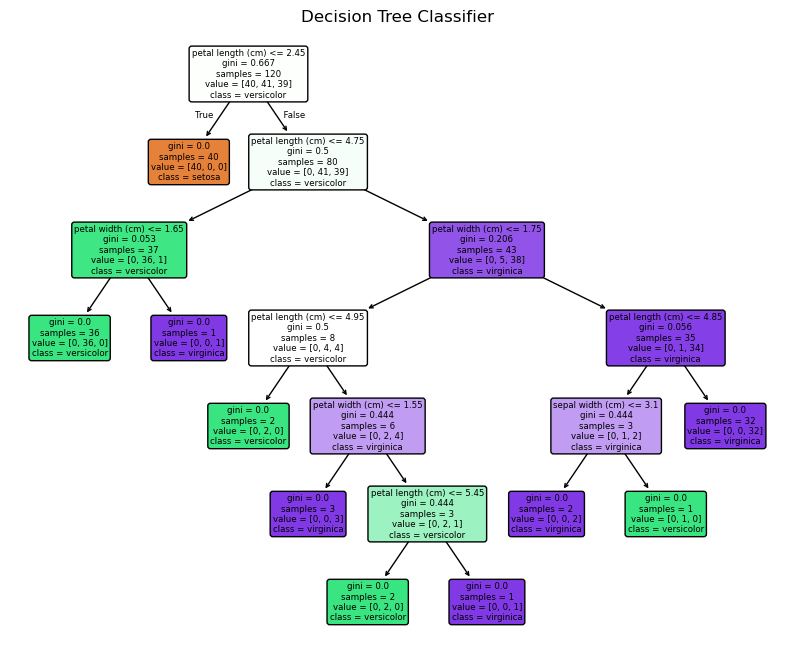


Random Forest Classifier - Performance:
Test Accuracy: 1.0000

AdaBoost Classifier - Performance:
Test Accuracy: 0.9333


In [13]:
#classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

# 1. Load the Iris dataset for classification
iris = load_iris()
X_class, y_class = iris.data, iris.target

# 2. Split dataset into training and test sets (80-20 split)
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# 3. Build the Decision Tree for Classification
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_class_train, y_class_train)

# 4. Evaluate performance on training and test data for classification
y_class_train_pred = dt_classifier.predict(X_class_train)
y_class_test_pred = dt_classifier.predict(X_class_test)

print("\nDecision Tree Classifier - Performance:")
print(f"Train Accuracy: {accuracy_score(y_class_train, y_class_train_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_class_test, y_class_test_pred):.4f}")

# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(dt_classifier, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.title("Decision Tree Classifier")
plt.show()

# 5. Apply Random Forest for Classification
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_class_train, y_class_train)

# Evaluate performance
y_rf_class_pred = rf_classifier.predict(X_class_test)
print("\nRandom Forest Classifier - Performance:")
print(f"Test Accuracy: {accuracy_score(y_class_test, y_rf_class_pred):.4f}")

# 6. Apply AdaBoost for Classification using Decision Stumps (shallow trees)
ada_classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
ada_classifier.fit(X_class_train, y_class_train)

# Evaluate performance
y_ada_class_pred = ada_classifier.predict(X_class_test)
print("\nAdaBoost Classifier - Performance:")
print(f"Test Accuracy: {accuracy_score(y_class_test, y_ada_class_pred):.4f}")
